In [76]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [77]:
import pandas as pd
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [78]:
# inputs for the function
directory = '/geos/u73/msadiq/co2_data/tccon.latest.public/'
filename = 'oc20080706_20191101.public.nc'
ds = xr.open_dataset(directory + filename, decode_times=False)
lon = ds['long_deg'].values[0]
lat = ds['lat_deg'].values[0]
name = ds.attrs['longName']
info = [name, lon, lat]
info

['lamont01', -97.49, 36.6]

In [79]:
file_dir = '/geos/u73/msadiq/co2_data/tccon.latest.public/'
file1 = open(file_dir + 'filenames', 'r')
lines = file1.readlines()

In [80]:
nm_loc = len(lines) # number of locations
loc_dict_tccon = []

for iline in range(len(lines)):
    filename = lines[iline].strip()
    #print(filename)
    
    ds = xr.open_dataset(directory + filename, decode_times=False)
    lon = ds['long_deg'].values[0]
    lat = ds['lat_deg'].values[0]
    name = ds.attrs['longName']
    
    loc_dict_tccon.append((name,lon,lat))

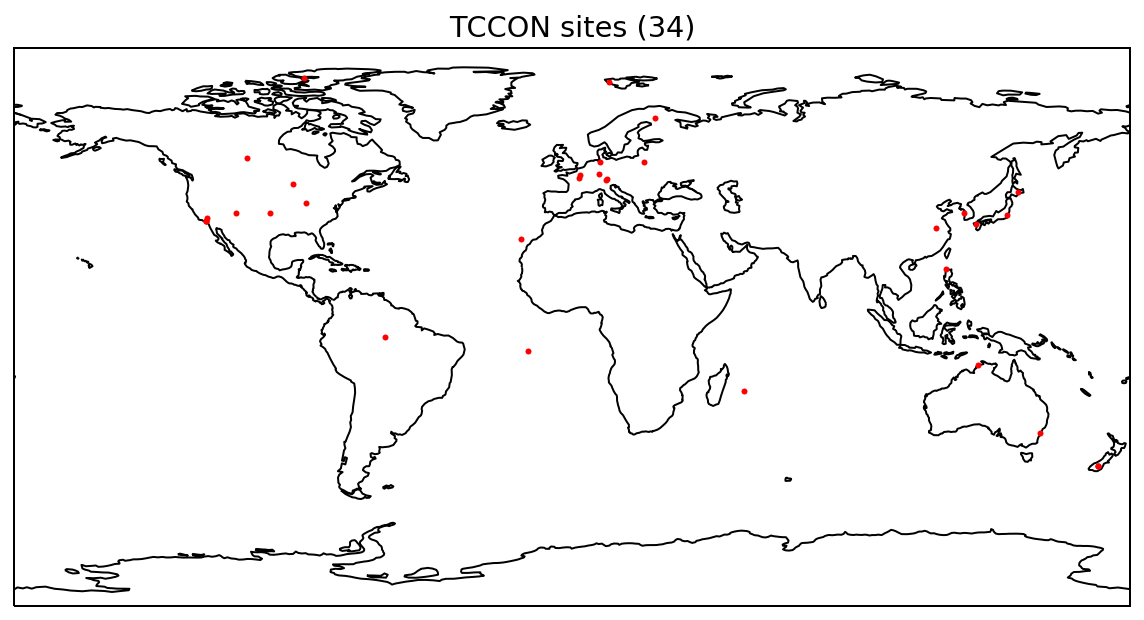

In [81]:
# plot after mapping
fig = plt.figure(figsize=[10, 7])
proj=ccrs.PlateCarree()

ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent((-180.0, 180.0, -90., 90.0))

for name, lon, lat in loc_dict_tccon:
    plt.plot(lon, lat, marker='.', markersize=6.0, markeredgewidth=0,
                 markerfacecolor='red')

ax.set_title('TCCON sites (' + str(nm_loc) + ')');

#fig.savefig(file_dir + 'noaa_locations_global.png', dpi=300)

In [82]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
file1 = open(file_dir + 'filenames_2018', 'r')
lines = file1.readlines()

In [83]:
nm_loc = len(lines) # number of locations
loc_dict_noaa = []

for ifile in range(nm_loc):
    filename = lines[ifile].strip()
    ds = xr.open_dataset(file_dir + filename)
    code = ds.attrs['site_code']
    lon = ds.attrs['site_longitude']
    lat = ds.attrs['site_latitude']
    
    loc_dict_noaa.append((code,lon,lat))

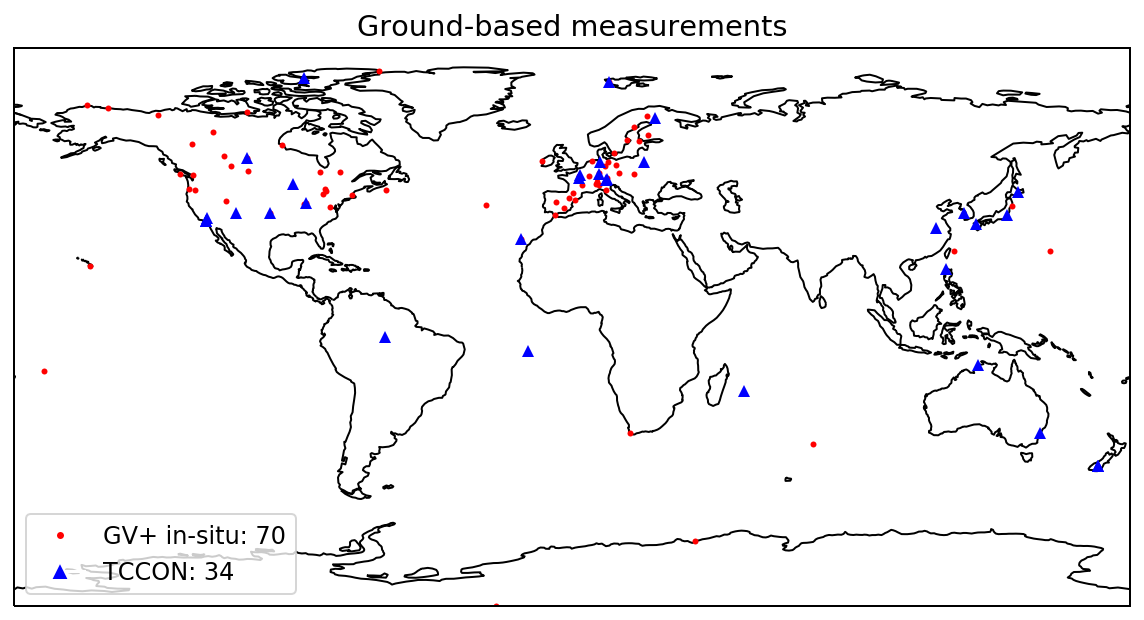

In [84]:
# plot after mapping
fig = plt.figure(figsize=[10, 7])
proj=ccrs.PlateCarree()

ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent((-180.0, 180.0, -90., 90.0))

for name, lon, lat in loc_dict_noaa:
    plt.plot(lon, lat, marker='.', markersize=6.0, markeredgewidth=0,
                 markerfacecolor='red')

for name, lon, lat in loc_dict_tccon:
    plt.plot(lon, lat, marker='^', markersize=6.0, markeredgewidth=0,
                 markerfacecolor='blue')

legend_elements = [Line2D([0], [0], marker='.', color = 'w', label='GV+ in-situ: ' + str(len(loc_dict_noaa)),
                          markerfacecolor='red', markersize=9.0),
                   Line2D([0], [0], marker='^', color = 'w', label='TCCON: '+ str(len(loc_dict_tccon)),
                          markerfacecolor='blue', markersize=9.0)]
                   
ax.legend(handles = legend_elements, loc='lower left')
ax.set_title('Ground-based measurements');

fig.savefig(file_dir + 'tccon_noaa_locations_global.png', dpi=300)